# Regularization

In [1]:
#import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
#perform required EDA process 
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["normalized-losses"] = df["normalized-losses"].astype(float)
losses_mean = df["normalized-losses"].mean()
df["normalized-losses"].fillna(losses_mean,inplace=True)

In [6]:
#perform required EDA process
df["horsepower"].replace("?",np.nan,inplace=True)
df["horsepower"] = df["horsepower"].astype(float)
horsepower_mean = df["horsepower"].mean()
df["horsepower"].fillna(horsepower_mean,inplace=True)

In [7]:
#check all columns datatypes 
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [8]:
#let's separate data in numeric and categorical in another df
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [9]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [10]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [11]:
#give label encoding to categorical columns

from sklearn.preprocessing import LabelEncoder

In [12]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [14]:
#merage curated df togather 
df_new = pd.concat([df_num,df_cat],axis=1)

In [15]:
#check data is ready for process
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


# Baseline model

In [16]:
#import required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#select data 
X = df_new.drop("price",axis=1)
y = df_new["price"]

In [18]:
#test Train model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
lin = LinearRegression()
#best fit line
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#shortcut to y2_score function
print("Training=>",lin.score(X_train,y_train))
print("Test=>",lin.score(X_test,y_test))

#difference is 6 points so data is overfitting

Training=> 0.8504573774895473
Test=> 0.7965566780397383


In [21]:
lin.coef_

array([ 4.51384957e+01,  1.53127607e+00,  7.89452171e+02,  3.62663990e+02,
        9.83682875e+01, -1.08169245e+01,  3.08017854e+02, -4.17024371e+02,
       -2.00099087e+02, -6.22650015e+02, -1.70235175e+02,  1.86860719e+03,
        1.64133620e+04,  2.83174279e+02])

In [22]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [23]:
#Ridge
#give small values as hyper parameter in ridge because its rest 2 
r=Ridge(10)
r.fit(X_train,y_train)
r.coef_


array([ 2.08658930e+02, -5.60173023e-01,  3.64420144e+02,  5.72916414e+02,
        1.04441215e+02,  2.21332730e+01,  2.11271281e+02, -2.72864381e+02,
       -1.86340249e+02, -9.06610516e+02, -6.30655861e+02,  1.56860422e+03,
        2.57047785e+03,  5.15948757e+02])

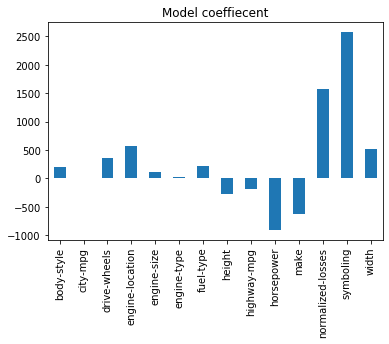

In [26]:
predictor=X_train.columns
coef=pd.Series(r.coef_,predictor.sort_values())
coef.plot(kind="bar",title="Model coeffiecent")

In [28]:
#high hyperparameter helps us for feature calculation means where 0 we can remove those columns 
#its works on absolute
l=Lasso(1000)
l.fit(X_train,y_train)
l.coef_

array([   0.        ,    3.96310671,    0.        ,  276.93279232,
        135.34169218,   16.00129073,   -0.        , -113.03311963,
       -126.40695244,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ])

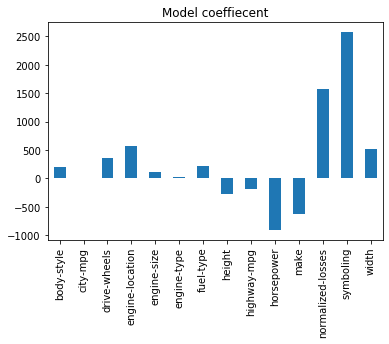

In [27]:
predictor=X_train.columns
coef=pd.Series(r.coef_,predictor.sort_values())
coef.plot(kind="bar",title="Model coeffiecent")

In [ ]:
#Lasso (r) and Ridge (l) Regularization
#find best r2
for i in range(50):
    r = Ridge(alpha=i)
    r.fit(X_train,y_train)
    print(i,":",r.score(X_test,y_test))

In [ ]:
#lasso find best out of it
for i in range(200,500,50):
    l = Lasso(alpha=i)
    l.fit(X_train,y_train)
    print(i,":",l.score(X_test,y_test))

In [ ]:
#final Model
r=Ridge(alpha=2)
r.fit(X_train,y_train)
print(r.score(X_test,y_test))

In [ ]:
#final Model
l=Lasso(alpha=200)
l.fit(X_train,y_train)
print(l.score(X_test,y_test))

# k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#cv=4 is k that will make 4 fold of data 
l1_cross = cross_val_score(r,X,y,cv=4)
print(l1_cross)

In [ ]:
l2_cross = cross_val_score(l,X,y,cv=4)
print(l2_cross)

In [ ]:
np.mean(l1_cross)

In [ ]:
np.mean(l2_cross)